# *Tech Challenge - Fase 4*

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates
import seaborn as sb
from statsmodels.tsa.seasonal import seasonal_decompose

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/ailaendo/TechChallenge_Fase4/refs/heads/main/preco_petroleo.csv", sep = ",")

In [4]:
df.head()

,Data,Último,Abertura,Máxima,Mínima,Vol.,Var%
0,31.12.2023,"78,54","77,31","79,22","74,82","801,74K","2,12%"
1,24.12.2023,"76,91","78,74","81,45","76,60","832,88K","-2,40%"
2,17.12.2023,"78,80","77,06","80,60","76,00","1,39M","2,66%"
3,10.12.2023,"76,76","75,87","77,53","72,67","1,16M","1,00%"
4,03.12.2023,"76,00","79,37","79,60","73,85","1,19M","-3,52%"


In [5]:
df['Data'] = pd.to_datetime(df['Data'])

C:\Users\gakir\AppData\Local\Temp\ipykernel_9904\152679825.py:1: UserWarning: Parsing dates in %d.%m.%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Data'] = pd.to_datetime(df['Data'])


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Data      261 non-null    datetime64[ns]
 1   Último    261 non-null    object        
 2   Abertura  261 non-null    object        
 3   Máxima    261 non-null    object        
 4   Mínima    261 non-null    object        
 5   Vol.      261 non-null    object        
 6   Var%      261 non-null    object        
dtypes: datetime64[ns](1), object(6)
memory usage: 14.4+ KB


In [7]:
df['Data'] = pd.to_datetime(df['Data'], format='%d/%m/%Y')
df['Último'] = df['Último'].str.replace(',', '.')
df['Último'] = pd.to_numeric(df['Último'], errors='coerce')
df[['ds', 'y']] = df[['Data', 'Último']]
df.head()

,Data,Último,Abertura,Máxima,Mínima,Vol.,Var%,ds,y
0,2023-12-31,78.54,"77,31","79,22","74,82","801,74K","2,12%",2023-12-31,78.54
1,2023-12-24,76.91,"78,74","81,45","76,60","832,88K","-2,40%",2023-12-24,76.91
2,2023-12-17,78.80,"77,06","80,60","76,00","1,39M","2,66%",2023-12-17,78.80
3,2023-12-10,76.76,"75,87","77,53","72,67","1,16M","1,00%",2023-12-10,76.76
4,2023-12-03,76.00,"79,37","79,60","73,85","1,19M","-3,52%",2023-12-03,76.00


In [8]:
train_data = df.sample(frac=0.8, random_state=0)
test_data = df.drop(train_data.index)
print(f'training data size : {train_data.shape}')
print(f'testing data size : {test_data.shape}')

training data size : (209, 9)
testing data size : (52, 9)


In [9]:
from prophet import Prophet

modelo = Prophet(daily_seasonality=True)
modelo.fit(train_data)
dataFramefuture = modelo.make_future_dataframe(periods=20, freq='M')
previsao = modelo.predict(dataFramefuture)
previsao.head()

c:\Users\gakir\AppData\Local\Programs\Python\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
21:52:57 - cmdstanpy - INFO - Chain [1] start processing
21:52:57 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\gakir\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2019-01-06,61.964200,58.508874,77.502825,61.964200,61.964200,5.935523,5.935523,5.935523,7.362385,7.362385,7.362385,-1.426862,-1.426862,-1.426862,0.0,0.0,0.0,67.899724
1,2019-01-13,61.630553,58.638208,77.433005,61.630553,61.630553,6.401234,6.401234,6.401234,7.362385,7.362385,7.362385,-0.961151,-0.961151,-0.961151,0.0,0.0,0.0,68.031787
2,2019-01-20,61.296905,58.544759,77.729636,61.296905,61.296905,6.774329,6.774329,6.774329,7.362385,7.362385,7.362385,-0.588056,-0.588056,-0.588056,0.0,0.0,0.0,68.071234
3,2019-02-03,60.629610,57.696197,77.047468,60.629610,60.629610,7.290094,7.290094,7.290094,7.362385,7.362385,7.362385,-0.072291,-0.072291,-0.072291,0.0,0.0,0.0,67.919704
4,2019-02-10,60.295962,59.605568,77.421036,60.295962,60.295962,8.255989,8.255989,8.255989,7.362385,7.362385,7.362385,0.893604,0.893604,0.893604,0.0,0.0,0.0,68.551951


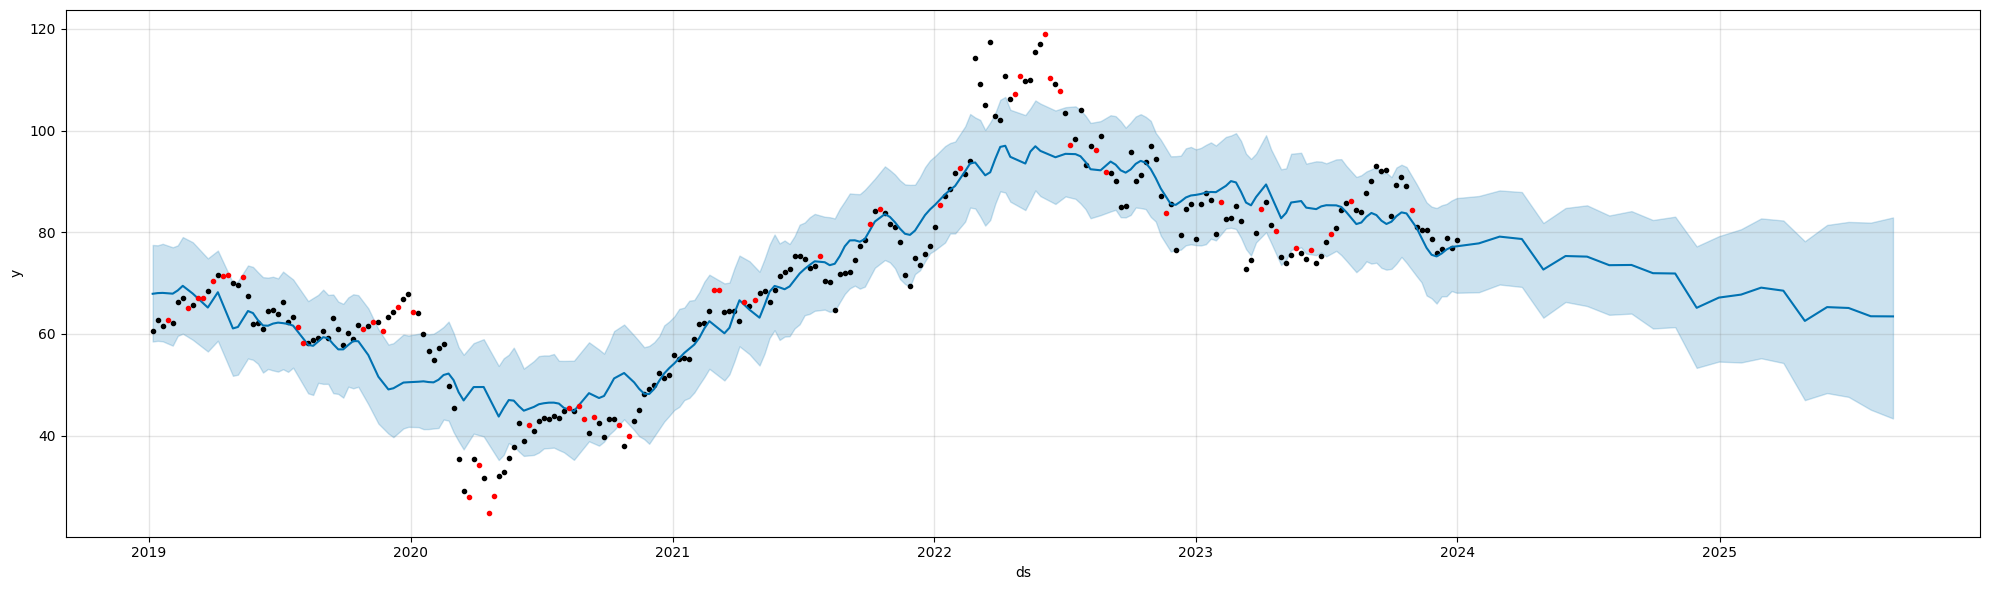

In [10]:
modelo.plot(previsao, figsize=(20,6))
plt.plot(test_data['ds'], test_data['y'], '.r')

In [11]:
from sklearn.metrics import mean_squared_error

previsao_cols = ['ds', 'yhat']
valores_reais_cols = ['ds', 'y']

previsao = previsao[previsao_cols]
valores_reais = train_data[valores_reais_cols]

resultados = pd.merge(previsao, valores_reais, on='ds', how='inner')

resultados['erro_percentual_absoluto'] = np.abs((resultados['y'] - resultados['yhat']) / resultados['y']) * 100

mape = np.mean(resultados['erro_percentual_absoluto'])


# Calcular o RMSE
rmse = np.sqrt(mean_squared_error(test_data['y'], previsao.loc[:len(test_data)-1, 'yhat']))

print(f"RMSE: {rmse}")
print(f"MAPE: {mape:.2f}%")

RMSE: 23.0301673971948
MAPE: 8.22%


In [12]:
# Criando um df contendo os dias no brasil que não possuem fechamento de bolsa (dias não úteis), para posteriormente excluir essas datas da predição.

import pandas as pd
from workalendar.america import Brazil

# Instanciando o calendário brasileiro
calendario_brasileiro = Brazil()

# Obtendo os feriados brasileiros de 2024
feriados_2024 = calendario_brasileiro.holidays(2024)

# Convertendo as datas dos feriados para o formato DataFrame
df_feriados = pd.DataFrame(feriados_2024, columns=['Data', 'Feriado'])

# Criando um DataFrame com todas as datas de 2024
datas_2024 = pd.date_range(start='2024-01-01', end='2024-12-31')

# Filtrando os dias não úteis (feriados e finais de semana)
dias_nao_uteis = datas_2024[(~datas_2024.isin(df_feriados['Data'])) & (datas_2024.weekday >= 5)]

# Criando um DataFrame com as datas de dias não úteis
df_dias_nao_uteis = pd.DataFrame({'Data': dias_nao_uteis, 'Dia útil': False})

C:\Users\gakir\AppData\Local\Temp\ipykernel_9904\231675244.py:19: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  dias_nao_uteis = datas_2024[(~datas_2024.isin(df_feriados['Data'])) & (datas_2024.weekday >= 5)]


In [13]:
df_dias_nao_uteis.head()

,Data,Dia útil
0,2024-01-06,False
1,2024-01-07,False
2,2024-01-13,False
3,2024-01-14,False
4,2024-01-20,False


In [14]:
# treinando o modelo já retirando dias não úteis

from prophet import Prophet

modelo = Prophet(daily_seasonality=True)
modelo.fit(train_data)
dataFramefuture = modelo.make_future_dataframe(periods=90, freq='D')
dataFramefuture = dataFramefuture[~dataFramefuture['ds'].isin(df_dias_nao_uteis['Data'])]
previsao = modelo.predict(dataFramefuture)
previsao.head()

21:52:58 - cmdstanpy - INFO - Chain [1] start processing
21:52:58 - cmdstanpy - INFO - Chain [1] done processing


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2019-01-06,61.964200,57.995813,77.628194,61.964200,61.964200,5.935523,5.935523,5.935523,7.362385,7.362385,7.362385,-1.426862,-1.426862,-1.426862,0.0,0.0,0.0,67.899724
1,2019-01-13,61.630553,59.352659,77.057905,61.630553,61.630553,6.401234,6.401234,6.401234,7.362385,7.362385,7.362385,-0.961151,-0.961151,-0.961151,0.0,0.0,0.0,68.031787
2,2019-01-20,61.296905,58.378739,77.194805,61.296905,61.296905,6.774329,6.774329,6.774329,7.362385,7.362385,7.362385,-0.588056,-0.588056,-0.588056,0.0,0.0,0.0,68.071234
3,2019-02-03,60.629610,58.497742,77.487804,60.629610,60.629610,7.290094,7.290094,7.290094,7.362385,7.362385,7.362385,-0.072291,-0.072291,-0.072291,0.0,0.0,0.0,67.919704
4,2019-02-10,60.295962,59.840876,77.540251,60.295962,60.295962,8.255989,8.255989,8.255989,7.362385,7.362385,7.362385,0.893604,0.893604,0.893604,0.0,0.0,0.0,68.551951


In [15]:
previsao

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2019-01-06,61.964200,57.995813,77.628194,61.964200,61.964200,5.935523,5.935523,5.935523,7.362385,7.362385,7.362385,-1.426862,-1.426862,-1.426862,0.0,0.0,0.0,67.899724
1,2019-01-13,61.630553,59.352659,77.057905,61.630553,61.630553,6.401234,6.401234,6.401234,7.362385,7.362385,7.362385,-0.961151,-0.961151,-0.961151,0.0,0.0,0.0,68.031787
2,2019-01-20,61.296905,58.378739,77.194805,61.296905,61.296905,6.774329,6.774329,6.774329,7.362385,7.362385,7.362385,-0.588056,-0.588056,-0.588056,0.0,0.0,0.0,68.071234
3,2019-02-03,60.629610,58.497742,77.487804,60.629610,60.629610,7.290094,7.290094,7.290094,7.362385,7.362385,7.362385,-0.072291,-0.072291,-0.072291,0.0,0.0,0.0,67.919704
4,2019-02-10,60.295962,59.840876,77.540251,60.295962,60.295962,8.255989,8.255989,8.255989,7.362385,7.362385,7.362385,0.893604,0.893604,0.893604,0.0,0.0,0.0,68.551951
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269,2024-03-25,69.255607,67.172122,86.064493,68.650223,69.979328,7.487276,7.487276,7.487276,7.362385,7.362385,7.362385,0.124891,0.124891,0.124891,0.0,0.0,0.0,76.742883
270,2024-03-26,69.227955,68.284242,86.680465,68.609724,69.973359,7.846997,7.846997,7.846997,7.362385,7.362385,7.362385,0.484612,0.484612,0.484612,0.0,0.0,0.0,77.074952
271,2024-03-27,69.200304,68.265666,86.660849,68.564380,69.964220,8.213294,8.213294,8.213294,7.362385,7.362385,7.362385,0.850909,0.850909,0.850909,0.0,0.0,0.0,77.413598
272,2024-03-28,69.172653,68.694896,86.518486,68.522644,69.954311,8.578153,8.578153,8.578153,7.362385,7.362385,7.362385,1.215767,1.215767,1.215767,0.0,0.0,0.0,77.750805


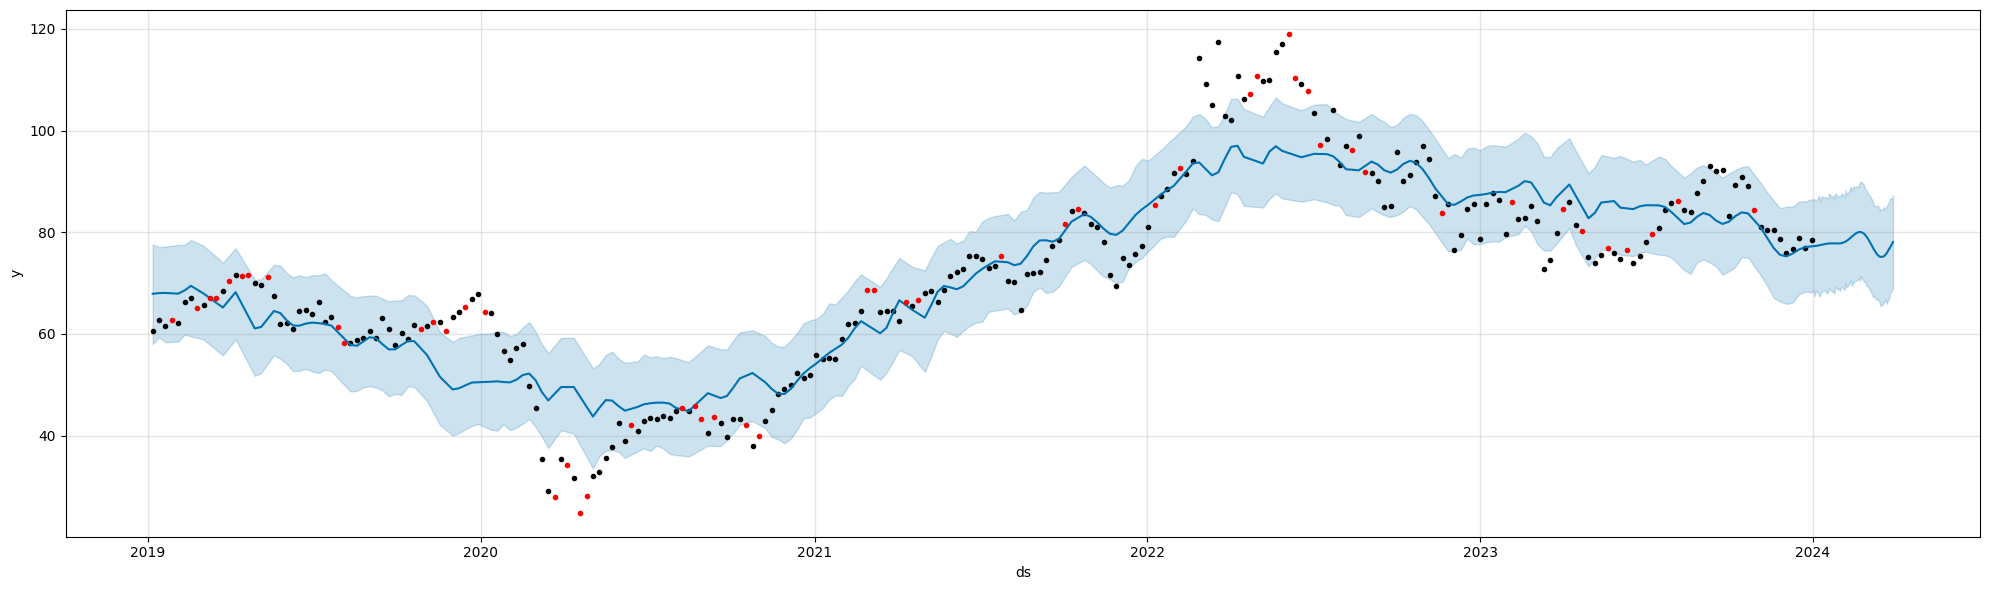

In [16]:
modelo.plot(previsao, figsize=(20,6))
plt.plot(test_data['ds'], test_data['y'], '.r')

In [17]:
from sklearn.metrics import mean_squared_error

previsao_cols = ['ds', 'yhat']
valores_reais_cols = ['ds', 'y']

previsao = previsao[previsao_cols]
valores_reais = train_data[valores_reais_cols]

resultados = pd.merge(previsao, valores_reais, on='ds', how='inner')

resultados['erro_percentual_absoluto'] = np.abs((resultados['y'] - resultados['yhat']) / resultados['y']) * 100

mape = np.mean(resultados['erro_percentual_absoluto'])


# Calcular o RMSE
rmse = np.sqrt(mean_squared_error(resultados['y'], previsao.loc[:len(resultados)-1, 'yhat']))

print(f"RMSE: {rmse}")
print(f"MAPE: {mape:.2f}%")

RMSE: 7.2194086413003316
MAPE: 8.22%


In [18]:
# Arredondar a coluna 'yhat' para duas casas decimais e renomear para 'Valor'
previsao['Valor'] = previsao['yhat'].round(2)

# Remover a coluna original 'yhat'
previsao.drop(columns=['yhat'], inplace=True)

# Renomear a coluna 'ds' para 'Data'
previsao.rename(columns={'ds': 'Data'}, inplace=True)

# Adcionando uma coluna com o ano
previsao['ano'] = previsao['Data'].dt.year

# Adcionando uma coluna com o número do mês
previsao['mes'] = previsao['Data'].dt.month

# Dicionário de mapeamento de número de mês para nome do mês
meses = {
    1: 'Janeiro',
    2: 'Fevereiro',
    3: 'Março',
    4: 'Abril',
    5: 'Maio',
    6: 'Junho',
    7: 'Julho',
    8: 'Agosto',
    9: 'Setembro',
    10: 'Outubro',
    11: 'Novembro',
    12: 'Dezembro'
}

# Aplicar o mapeamento para criar uma nova coluna com os nomes dos meses
previsao['nome_mes'] = previsao['mes'].map(meses)

C:\Users\gakir\AppData\Local\Temp\ipykernel_9904\405052750.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  previsao['Valor'] = previsao['yhat'].round(2)
C:\Users\gakir\AppData\Local\Temp\ipykernel_9904\405052750.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  previsao.drop(columns=['yhat'], inplace=True)
C:\Users\gakir\AppData\Local\Temp\ipykernel_9904\405052750.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/inde

In [19]:
previsao

,Data,Valor,ano,mes,nome_mes
0,2019-01-06,67.90,2019,1,Janeiro
1,2019-01-13,68.03,2019,1,Janeiro
2,2019-01-20,68.07,2019,1,Janeiro
3,2019-02-03,67.92,2019,2,Fevereiro
4,2019-02-10,68.55,2019,2,Fevereiro
...,...,...,...,...,...
269,2024-03-25,76.74,2024,3,Março
270,2024-03-26,77.07,2024,3,Março
271,2024-03-27,77.41,2024,3,Março
272,2024-03-28,77.75,2024,3,Março


In [20]:
previsao.to_csv('Previsao.csv', index=True)

In [21]:
df_2024 = previsao[previsao['ano'] == 2024]

In [22]:
df_2024

,Data,Valor,ano,mes,nome_mes
209,2024-01-01,77.25,2024,1,Janeiro
210,2024-01-02,77.27,2024,1,Janeiro
211,2024-01-03,77.28,2024,1,Janeiro
212,2024-01-04,77.31,2024,1,Janeiro
213,2024-01-05,77.33,2024,1,Janeiro
...,...,...,...,...,...
269,2024-03-25,76.74,2024,3,Março
270,2024-03-26,77.07,2024,3,Março
271,2024-03-27,77.41,2024,3,Março
272,2024-03-28,77.75,2024,3,Março


In [23]:
# Exportar para um arquivo CSV chamado 'Previsao.csv'
df_2024.to_csv('Previsao2024.csv', index=True)

In [24]:
df_2024

,Data,Valor,ano,mes,nome_mes
209,2024-01-01,77.25,2024,1,Janeiro
210,2024-01-02,77.27,2024,1,Janeiro
211,2024-01-03,77.28,2024,1,Janeiro
212,2024-01-04,77.31,2024,1,Janeiro
213,2024-01-05,77.33,2024,1,Janeiro
...,...,...,...,...,...
269,2024-03-25,76.74,2024,3,Março
270,2024-03-26,77.07,2024,3,Março
271,2024-03-27,77.41,2024,3,Março
272,2024-03-28,77.75,2024,3,Março
